In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



In [2]:
mnist_train = pd.read_csv('C:/Users/shadm/Desktop/mnist_train.csv')
mnist_test = pd.read_csv('C:/Users/shadm/Desktop/mnist_test.csv')

In [3]:
Data_train = mnist_train.to_numpy()
Data_test = mnist_test.to_numpy()

y_train = Data_train[:, 0]
x_train = Data_train[:, 1:]

x_test = Data_test[:, 1:]
y_test = Data_test[:, 0]

In [4]:
#x_train = np.array(x_train)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
#x_test = np.array(x_test)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


In [6]:


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_val = x_train[48000:60000]
x_train = x_train[:48000]
y_val = y_train[48000:60000]
y_train = y_train[:48000]


In [7]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
          epochs=50, batch_size=256, validation_data = (x_val, y_val))


Epoch 1/50
188/188 [==============================] - 27s 142ms/step - loss: 0.5830 - accuracy: 0.8179 - val_loss: 0.1081 - val_accuracy: 0.9694
Epoch 2/50
188/188 [==============================] - 27s 142ms/step - loss: 0.1649 - accuracy: 0.9517 - val_loss: 0.0676 - val_accuracy: 0.9803
Epoch 3/50
188/188 [==============================] - 28s 151ms/step - loss: 0.1155 - accuracy: 0.9666 - val_loss: 0.0536 - val_accuracy: 0.9836
Epoch 4/50
188/188 [==============================] - 28s 151ms/step - loss: 0.0923 - accuracy: 0.9735 - val_loss: 0.0488 - val_accuracy: 0.9855
Epoch 5/50
188/188 [==============================] - 29s 152ms/step - loss: 0.0744 - accuracy: 0.9792 - val_loss: 0.0452 - val_accuracy: 0.9870
Epoch 6/50
188/188 [==============================] - 29s 152ms/step - loss: 0.0662 - accuracy: 0.9807 - val_loss: 0.0438 - val_accuracy: 0.9869
Epoch 7/50
188/188 [==============================] - 29s 152ms/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.0365 - val_ac

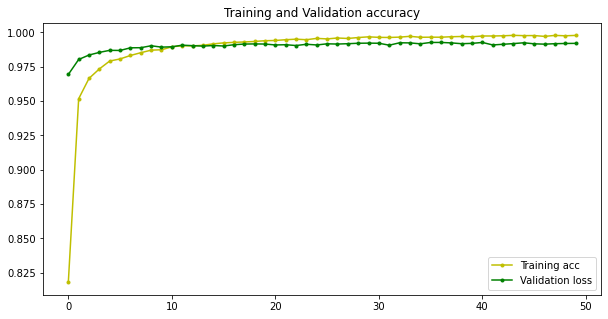

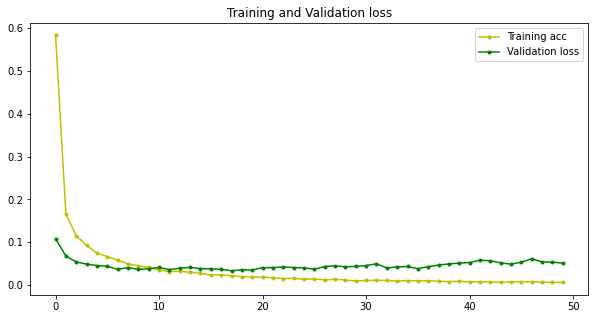

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 5))

plt.plot(epochs, acc, 'y.-', label='Training acc')
plt.plot(epochs, val_acc, 'g.-', label='Validation loss')
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure(figsize=(10, 5))

plt.plot(epochs, loss, 'y.-', label='Training acc')
plt.plot(epochs, val_loss, 'g.-', label='Validation loss')
plt.title("Training and Validation loss")
plt.legend()

plt.show()